<a href="https://colab.research.google.com/github/matsunagalab/md_analysis/blob/main/md_rmsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mdtraj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp310-cp310-linux_x86_64.whl size=7958376 sha256=ad07785b55371d0992dcd5915c4d5e72fd0260bcaf8cb1cd9ab5c5418d1e3ed4
  Stored in directory: /root/.cache/pip/wheels/ad/55/84/3b6abc1f4021160d8b6b876a9ed69148344f57bc443c1d2dd3
Successfully built mdtraj


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


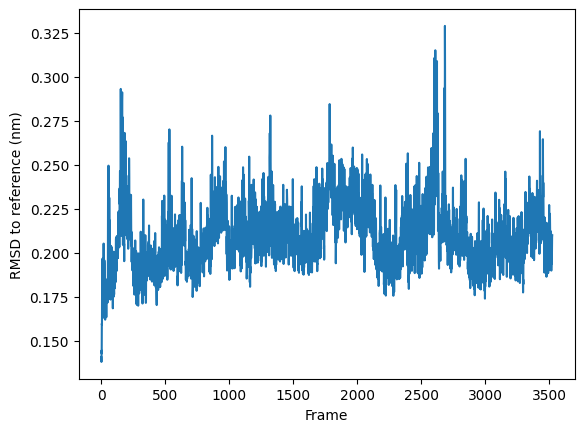

In [ ]:
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your files on your Google Drive
path = '/content/drive/MyDrive/data/lysozyme_wildtype/'
#path = '/content/drive/MyDrive/data/lysozyme_mutant/'

# Load the reference structure
ref = md.load(path + 'prot.pdb')

# Load the trajectory
traj = md.load(path + 'prot.dcd', top = path + 'prot.pdb')

# Ensure that the topology of trajectory is same as reference
traj.superpose(ref)

# Save the superimposed trajectory to a HDF5 file
traj.save(path + 'prot_superposed.dcd')
traj.save(path + 'prot_superposed.h5')

# Compute RMSD of each frame to the reference
rmsd = md.rmsd(traj, ref)

# Plot the RMSD
plt.plot(rmsd)
plt.xlabel('Frame')
plt.ylabel('RMSD to reference (nm)')
plt.show()
